# FINAL DRAFT OF THIS 
Inputs: cdom files 
outputs: wavelenths.csv, plot.png, outputs.csv
    
    redesinge from inputs 
    
    Hanna Bridgham 
    last edited 11/17/2022

## PART 1: QA/QC

Loading data and checking for issues 

In [2]:
#LOAD REQUIERD PACKAGES 
import os # OS library
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names

from scipy.interpolate import PchipInterpolator # Interpolator
import numpy as np
from scipy.optimize import minimize

In [18]:
files = glob.glob('../../../CDOM_DATA/GOM21FA/Water_columb/WC_11/*.txt')
files.sort()
files

['../../../CDOM_DATA/GOM21FA/Water_columb/WC_11\\215731_Absorbance__0__39.txt',
 '../../../CDOM_DATA/GOM21FA/Water_columb/WC_11\\215731_Absorbance__1__40.txt',
 '../../../CDOM_DATA/GOM21FA/Water_columb/WC_11\\215731_Absorbance__2__41.txt',
 '../../../CDOM_DATA/GOM21FA/Water_columb/WC_11\\215732_Absorbance__0__42.txt',
 '../../../CDOM_DATA/GOM21FA/Water_columb/WC_11\\215732_Absorbance__1__43.txt',
 '../../../CDOM_DATA/GOM21FA/Water_columb/WC_11\\215732_Absorbance__2__44.txt',
 '../../../CDOM_DATA/GOM21FA/Water_columb/WC_11\\215733_Absorbance__0__45.txt',
 '../../../CDOM_DATA/GOM21FA/Water_columb/WC_11\\215733_Absorbance__1__46.txt',
 '../../../CDOM_DATA/GOM21FA/Water_columb/WC_11\\215733_Absorbance__2__47.txt',
 '../../../CDOM_DATA/GOM21FA/Water_columb/WC_11\\215734_Absorbance__0__48.txt',
 '../../../CDOM_DATA/GOM21FA/Water_columb/WC_11\\215734_Absorbance__1__49.txt',
 '../../../CDOM_DATA/GOM21FA/Water_columb/WC_11\\215734_Absorbance__2__50.txt',
 '../../../CDOM_DATA/GOM21FA/Water_colum

In [19]:
# REMOVE THIS CELL ONE YOU GET IT
ID = os.path.basename(files[-1])[:-4].split("_")
print('basename. SO indep. Extract filename:', ID)
ID = list(filter(None, ID))
# '_'.join(ID[::3])
ID.pop(1)
print('pop removes position 1', ID)
ID = '_'.join(ID)
print(ID)
# ID = '_'.join(ID.remove('Absorbance'))
# ID

basename. SO indep. Extract filename: ['NaCl', 'blank', 'Absorbance', '', '2', '', '38']
pop removes position 1 ['NaCl', 'Absorbance', '2', '38']
NaCl_Absorbance_2_38


In [20]:
#LOAD FILE
def open_files(name):
    # reads individual scan files
    df = pd.read_table(name, skiprows=14,names=['wl', 'abs'], index_col='wl')
    # extract ID from filename
    ID = os.path.basename(name)[:-4].split("_")
    ID.pop(1)
    ID = '_'.join(list(filter(None, ID)))
    # rename col name with ID
    df = df.rename(columns={'abs': ID})
    return df

#LOOP TRU FILES TO MAKE ONE EASY TO USE DATA FRAME 
#columns are scanns and rows are wavelths 

frames = [open_files(f) for f in files]
df = pd.concat(frames, axis=1) # joins along cols  
df

,215731_0_39,215731_1_40,215731_2_41,215732_0_42,215732_1_43,215732_2_44,215733_0_45,215733_1_46,215733_2_47,215734_0_48,...,215737_2_59,215738_0_60,215738_1_61,215738_2_62,215739_0_63,215739_1_64,215739_2_65,NaCl_Absorbance_0_36,NaCl_Absorbance_1_37,NaCl_Absorbance_2_38
wl,,,,,,,,,,,,,,,,,,,,,
189.2794,-0.0318,-0.0313,-0.0284,-0.0302,-0.0315,-0.0417,-0.0485,-0.0514,-0.0480,-0.0498,...,-0.0754,-0.0813,-0.0815,-0.0796,-0.0785,-0.0724,-0.0718,-0.0142,-0.0238,-0.0161
189.6618,-0.0318,-0.0313,-0.0284,-0.0302,-0.0315,-0.0417,-0.0485,-0.0514,-0.0480,-0.0498,...,-0.0754,-0.0813,-0.0815,-0.0796,-0.0785,-0.0724,-0.0718,-0.0142,-0.0238,-0.0161
190.0441,-0.0318,-0.0313,-0.0284,-0.0302,-0.0315,-0.0417,-0.0485,-0.0514,-0.0480,-0.0498,...,-0.0754,-0.0813,-0.0815,-0.0796,-0.0785,-0.0724,-0.0718,-0.0142,-0.0238,-0.0161
190.4264,-0.0184,-0.0177,-0.0165,-0.0385,-0.0333,-0.0339,-0.0448,-0.0376,-0.0489,-0.0533,...,-0.0702,-0.0759,-0.0745,-0.0721,-0.0743,-0.0702,-0.0649,-0.0234,-0.0151,-0.0190
190.8087,-0.0301,-0.0275,-0.0253,-0.0366,-0.0337,-0.0350,-0.0519,-0.0522,-0.0559,-0.0458,...,-0.0740,-0.0833,-0.0717,-0.0799,-0.0788,-0.0683,-0.0799,-0.0232,-0.0182,-0.0203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880.5978,-0.0215,-0.0335,-0.0288,-0.0290,-0.0289,-0.0403,-0.0567,-0.0575,-0.0545,-0.0550,...,-0.0795,-0.0872,-0.0870,-0.0870,-0.0833,-0.0743,-0.0805,-0.0171,-0.0227,-0.0211
880.8884,-0.0348,-0.0375,-0.0213,-0.0367,-0.0430,-0.0411,-0.0569,-0.0501,-0.0526,-0.0605,...,-0.0874,-0.0809,-0.0884,-0.0838,-0.0837,-0.0946,-0.0855,-0.0247,-0.0211,-0.0230
881.1790,-0.0219,-0.0241,-0.0234,-0.0447,-0.0437,-0.0350,-0.0516,-0.0511,-0.0565,-0.0618,...,-0.0795,-0.0861,-0.0829,-0.0763,-0.0842,-0.0848,-0.0884,-0.0144,-0.0059,-0.0221


Text(0.5, 0, 'Wavelength')

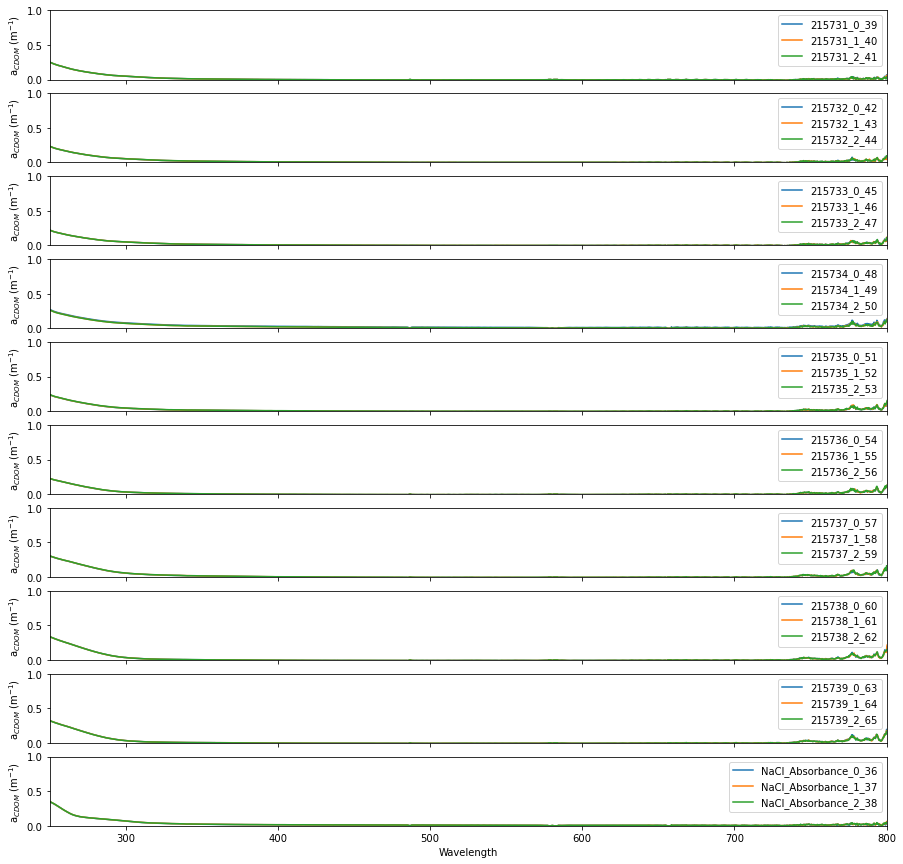

In [21]:
# Plot per sample
# First portion of col name is sample name
names = [name[0] for name in df.columns.str.rsplit('_')]
week_grps = df.groupby(names, axis = 1)
fig, axs = plt.subplots(nrows=len(week_grps), figsize=(15,1.5*len(week_grps)),
                       sharex=True, sharey=True)
for ax,(i, sub) in zip(axs, week_grps):
    sub.plot(label='', ax=ax)
    ax.set_ylim(0,1)
    ax.set_xlim(250,800)
    ax.set_ylabel("a$_{CDOM}$ (m$^{-1}$)")
axs[-1].set_xlabel("Wavelength")

In [23]:
#TEST AND REMOVE BAD SCANNS  
# Number of standard deviation that defines 'outlier'.
var = 2.5 

z = df[250:700].groupby(names, 
                        axis = 1).transform(lambda grp: (grp - grp.mean())/grp.std())

test = z.abs().mean(skipna=True)<var
test = test[test==False] # Just print the bad ones

# DROP THE BAD FILES!!!!
df_clean = df
df_clean = df.drop(columns=test.index) # drop bad scans

test 
len(df_clean.columns)



30

## PART 2: CORRECTING THE DATA 

- Absorbace to absorption 

- Salinity coorection 

- Temprature correction 

### Absorbance to absortion

absortion = absorbance*(2.303/pathlength)

30


-6.137872540983607

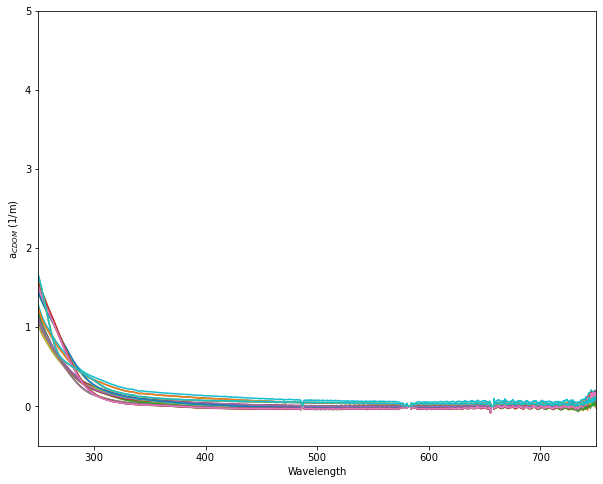

In [24]:
pathlength = .488
df_cl = df_clean*(2.303/pathlength) # to avoid overwriting when reruning the cell
df_cl

#make a plot to make sure nothing is too crazy 
ylimmin = -.5
ylimmax = 5

fig, ax = plt.subplots(figsize=(10,8))
df_cl.plot(ax=ax, legend=None)
ax.set_ylim(ylimmin,ylimmax)
ax.set_xlim(250,750)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")

print(len(df_cl.columns))
df_cl.min().min()

### Salinity correction

Text(0, 0.5, 'a$_{CDOM}$ (1/m)')

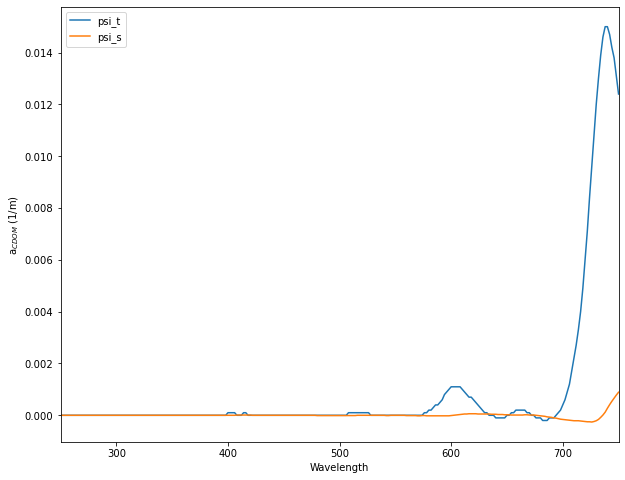

In [25]:
#Load correction values 
corr = pd.read_csv('../../../CDOM_DATA/sal_temp_corr.csv')
corr.rename(columns={'wl_nm':'wl'}, inplace=True)
corr.set_index('wl', inplace=True)

# Plot
fig, ax = plt.subplots(figsize=(10,8))
corr.plot(ax=ax)
# ax.set_ylim(-.01,.03)
ax.set_xlim(250,750)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")

Text(0, 0.5, 'a$_{CDOM}$ (1/m)')

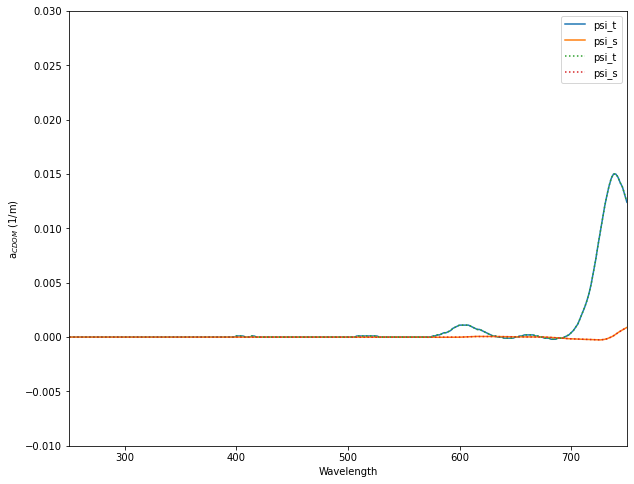

In [26]:
#HERE WE LOAD AND INTIGRATE THE CORRECTION VALUES 

#Load correction values 
pathlength = .488
df_c1 = df_clean*(2.303/pathlength)
corr = pd.read_csv('../../../CDOM_DATA/sal_temp_corr.csv')
corr.rename(columns={'wl_nm':'wl'}, inplace=True)
corr.set_index('wl', inplace=True)

# Interpolate corr curve to measured wl 
x = corr.index # corr wl
xi = df_c1[250:750].index # measured wl, no need to overwrite

#pchip temp  
y = corr['psi_t'] 
pchip_t = PchipInterpolator(x, y, axis=1)
psi_t = pchip_t(xi) 

#pchip salt 
y = corr['psi_s'] 
pchip_s = PchipInterpolator(x, y, axis=1)
psi_s = pchip_s(xi)

# to dataframe
correction = pd.DataFrame({'psi_t': psi_t, 'psi_s':psi_s}, index=xi)

# Plot
fig, ax = plt.subplots(figsize=(10,8))
corr.plot(ax=ax)
correction.plot(ls=':',ax=ax)
ax.set_ylim(-.01,.03)
ax.set_xlim(250,750)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
#ax.get_legend().remove() 

### Salinity correction
from sullivan 2006 

abs = abs_mesured - psu*psi_s 

30


-0.08623057377049181

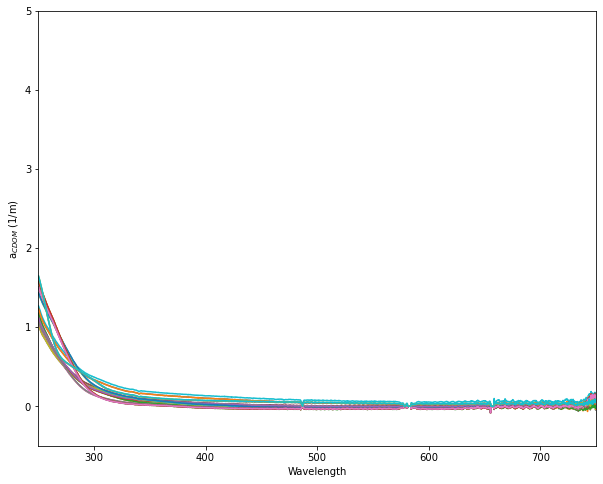

In [27]:
#HERE WE CORRECT FOR SALINITY
#from sullivan 2006 
#a = a_m - psu*psi_s 

psu = 34
df_cs = df_cl[250:750].sub(psu*correction['psi_s'], axis=0)

fig, ax = plt.subplots(figsize=(10,8))
df_cs.plot(ax=ax, legend=None)
ax.set_ylim(ylimmin,ylimmax)
ax.set_xlim(250,750)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")

print(len(df_cs.columns))
df_cs.min().min()

### Temperature correction
from sullivan 2006 

abs = abs_mesured - temp*psi_t 

Text(0, 0.5, 'a$_{CDOM}$ (1/m)')

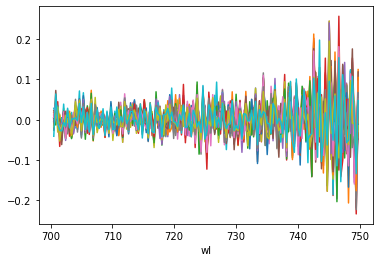

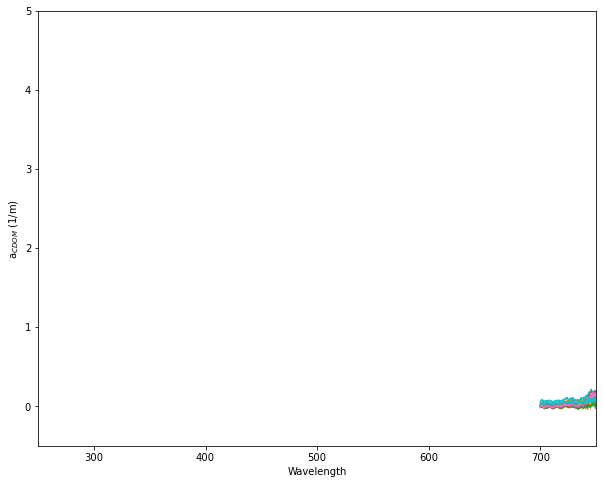

In [28]:
#HERE WE COREECT FOR TEMPRATURE
#from sullivan 2006 
#a = a_m - temp*psi_t 
#find value of temp where derivative is 0  

df_700 = df_cs[700:750] # df_cs is clean, abs and sal corrct aplied
temp_cor_700 = correction[700:750]['psi_t']       

temp = -1.8
df_ct = df_700.sub(temp*temp_cor_700, axis=0)
der = df_ct.diff().divide(df_ct.index.to_series().diff(), axis=0)
der.plot(legend=None)

fig, ax = plt.subplots(figsize=(10,8))
df_ct.plot(ax=ax, legend=None)
ax.set_ylim(ylimmin,ylimmax)
ax.set_xlim(250,750)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")

In [29]:
def temp_cor(temp,
             c_abs, # the column
             t_cor= correction['psi_t']# the correction
            ):
    return (c_abs-t_cor*temp)

# this is the function to minimize the derivative 
def slope(temp, col_abs):
    cor = temp_cor(temp, c_abs=col_abs, t_cor=correction[700:750]['psi_t'])
    diff = cor.diff().divide(cor.index.to_series().diff(), axis=0)
    return  np.absolute(diff).sum()

# this is the function to minimize the root mean squared 
def rmse(temp, col_abs):
    cor = temp_cor(temp, c_abs=col_abs, t_cor=correction[700:750]['psi_t'])
    col_abs_mean = col_abs.mean()
    col_resid = cor-col_abs_mean
    diff = np.sqrt(np.mean(col_resid**2))
    return  diff

[-0.14110674]


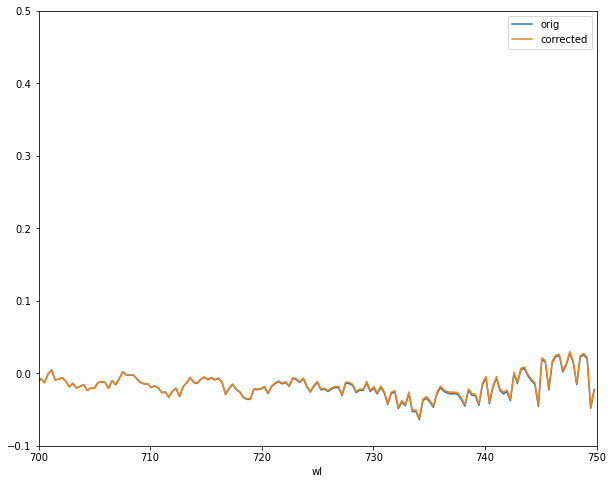

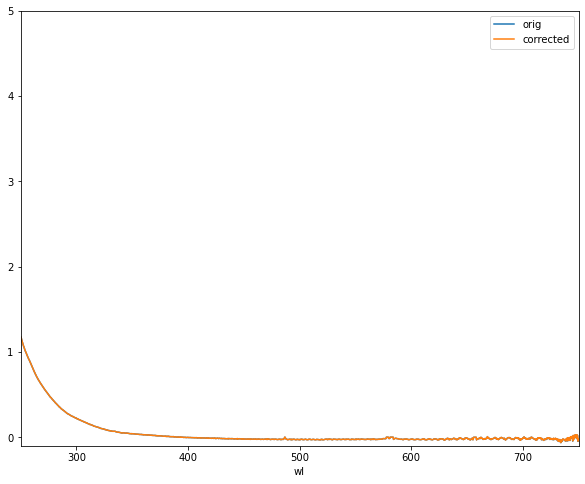

In [32]:
# minimization
#maybe play with bonds for improvement
#minimize(rmse, temp0, df_700.iloc[:,0], bounds=(min,max))

coln = 0

# for temp0 in range(-4,30):
res = minimize(rmse, -1, df_700.iloc[:,coln])
print(res.x)
# Once a good minimization is found apply by column

# corrected column
col_ct = temp_cor(res.x, df_cs.iloc[:,coln])

# PLOTS

fig, ax = plt.subplots(figsize=(10,8))
df_cs.iloc[:,0].plot(ax=ax, label='orig')
col_ct.plot(ax=ax, label='corrected')
ax.set_ylim(-.1,.5)
ax.set_xlim(700,750)
# ax.set_xlabel("Wavelength")
# ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.legend()
# df.min().min()
    
fig, ax = plt.subplots(figsize=(10,8))
df_cs.iloc[:,0].plot(ax=ax, label='orig')
col_ct.plot(ax=ax, label='corrected')
ax.set_ylim(-.1,5)
ax.set_xlim(250,750)
# ax.set_xlabel("Wavelength")
# ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.legend()
# df.min().min()

[-0.14110674]
[-0.21374343]
[-0.1773739]
[0.1766127]
[0.18996214]
[0.18750357]
[0.28274045]
[0.27322048]
[0.26680871]
[0.80499643]
[0.67785523]
[0.61652714]
[0.59112937]
[0.5972228]
[0.61730058]
[0.69669646]
[0.72021463]
[0.76302584]
[1.15906731]
[1.11909574]
[1.19469094]
[1.24793571]
[1.20943694]
[1.28718488]
[1.14306919]
[1.08973214]
[1.1203971]
[0.17290303]
[0.11398977]
[0.1371244]
Min val of sal Corr: -0.08623057377049181
Min val of temo Corr: -0.08634648050174808


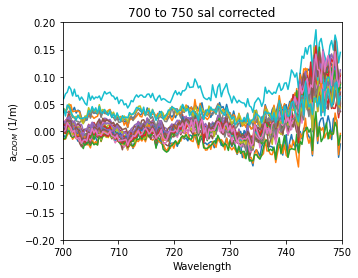

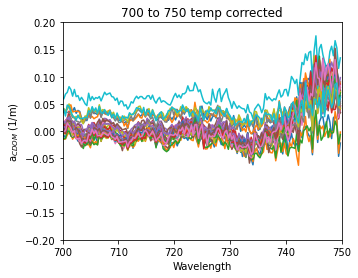

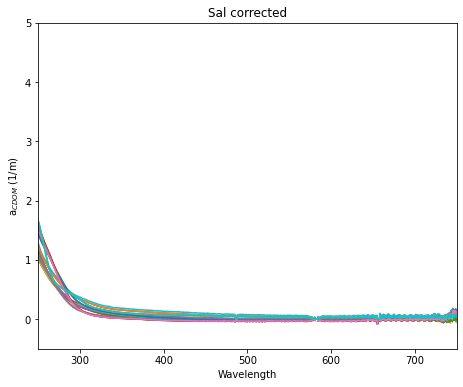

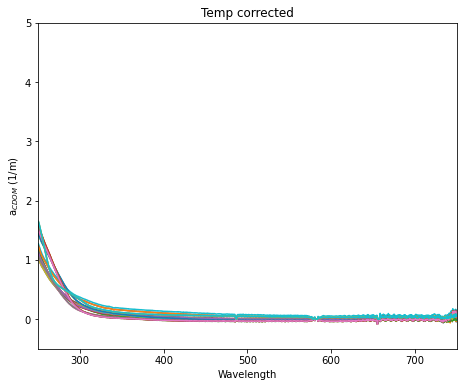

In [31]:
# minimization
#maybe play with bonds for improvement
#minimize(rmse, temp0, df_700.iloc[:,0], bounds=(min,max))

coln = np.arange(0, len(df_700.columns), 1, dtype=int)
Frames = []

for col in coln:
    res = minimize(rmse, -1, df_700.iloc[:,col])
    col_ct = temp_cor(res.x, df_cs.iloc[:,col])
    print(res.x)
    Frames.append(col_ct)

df_ct = pd.concat(Frames, axis=1, ignore_index=False)
New_Labels = df_cs.columns
df_ct.columns = New_Labels

fig, ax = plt.subplots(figsize=(5,4))
df_cs.plot(ax=ax, legend=None)
ax.set_ylim(-.2,.2)
ax.set_xlim(700,750)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.set_title("700 to 750 sal corrected")
#ax.legend()

fig, ax = plt.subplots(figsize=(5,4))
df_ct.plot(ax=ax, legend=None)
ax.set_ylim(-.2,.2)
ax.set_xlim(700,750)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.set_title("700 to 750 temp corrected")
#ax.legend()

fig, ax = plt.subplots(figsize=(7.5,6))
df_cs.plot(ax=ax, legend=None)
ax.set_ylim(-.5,5)
ax.set_xlim(250,750)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.set_title("Sal corrected")
#ax.legend()

fig, ax = plt.subplots(figsize=(7.5,6))
df_ct.plot(ax=ax, legend=None)
ax.set_ylim(-.5,5)
ax.set_xlim(250,750)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.set_title("Temp corrected")
#ax.legend()

print("Min val of sal Corr:",df_cs.min().min()) 
print("Min val of temo Corr:",df_ct.min().min()) 

# res = minimize(optum, x0, method='nelder-mead',
#                options={'xatol': 1e-8, 'disp': True})
#https://docs.scipy.org/doc/scipy/tutorial/optimize.html#unconstrained-minimization-of-multivariate-scalar-functions-minimize

[-1.27348059]


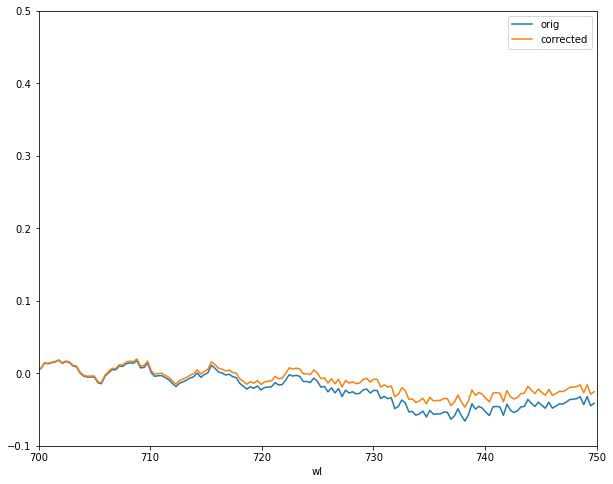

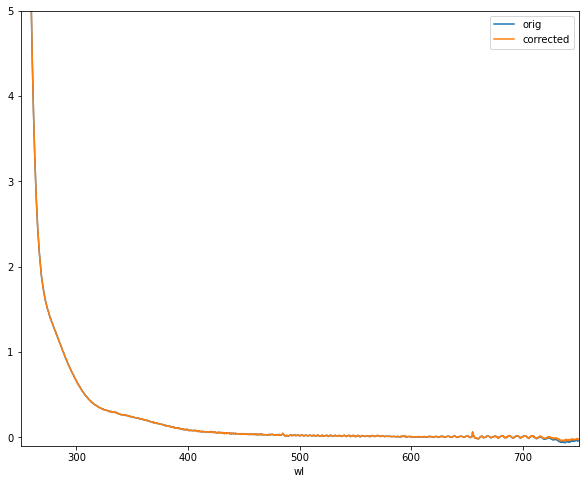

In [21]:
# minimization
#maybe play with bonds for improvement
#minimize(slope, temp0, df_700.iloc[:,0], bounds=(min,max))

coln = 0

# for temp0 in range(-4,30):
res = minimize(slope, -1, df_700.iloc[:,coln])
print(res.x)
# Once a good minimization is found apply by column

# corrected column
col_ct = temp_cor(res.x, df_cs.iloc[:,coln])

# PLOTS

fig, ax = plt.subplots(figsize=(10,8))
df_cs.iloc[:,0].plot(ax=ax, label='orig')
col_ct.plot(ax=ax, label='corrected')
ax.set_ylim(-.1,.5)
ax.set_xlim(700,750)
# ax.set_xlabel("Wavelength")
# ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.legend()
# df.min().min()
    
fig, ax = plt.subplots(figsize=(10,8))
df_cs.iloc[:,0].plot(ax=ax, label='orig')
col_ct.plot(ax=ax, label='corrected')
ax.set_ylim(-.1,5)
ax.set_xlim(250,750)
# ax.set_xlabel("Wavelength")
# ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.legend()
# df.min().min()

Min val of sal Corr: -0.1444094262295082
Min val of temo Corr: -0.1444094262295082


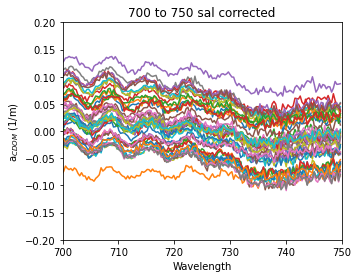

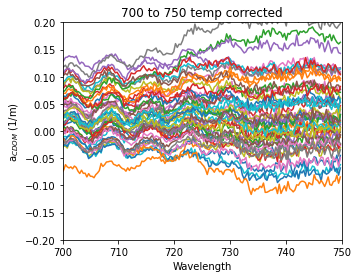

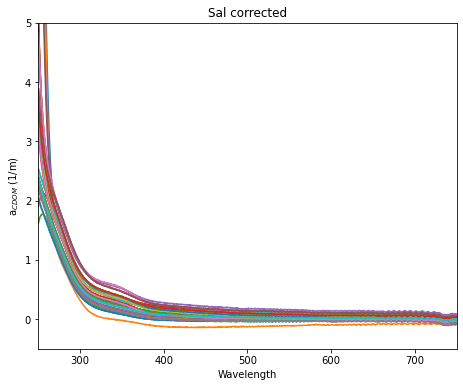

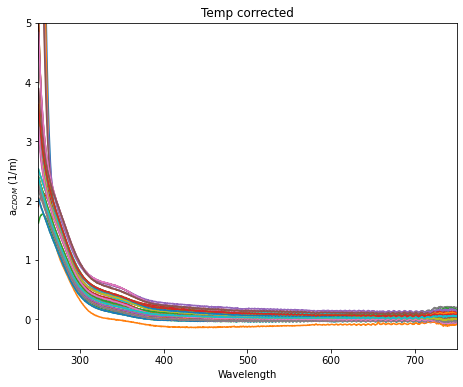

In [32]:
# minimization
#maybe play with bonds for improvement
#minimize(slope, temp0, df_700.iloc[:,0], bounds=(min,max))

coln = np.arange(0, len(df_700.columns), 1, dtype=int)
Frames = []

for col in coln:
    res = minimize(slope, -1, df_700.iloc[:,col])
    col_ct = temp_cor(res.x, df_cs.iloc[:,col])
    Frames.append(col_ct)

df_ct = pd.concat(Frames, axis=1, ignore_index=False)
New_Labels = df_cs.columns
df_ct.columns = New_Labels

fig, ax = plt.subplots(figsize=(5,4))
df_cs.plot(ax=ax, legend=None)
ax.set_ylim(-.2,.2)
ax.set_xlim(700,750)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.set_title("700 to 750 sal corrected")
#ax.legend()

fig, ax = plt.subplots(figsize=(5,4))
df_ct.plot(ax=ax, legend=None)
ax.set_ylim(-.2,.2)
ax.set_xlim(700,750)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.set_title("700 to 750 temp corrected")
#ax.legend()

fig, ax = plt.subplots(figsize=(7.5,6))
df_cs.plot(ax=ax, legend=None)
ax.set_ylim(-.5,5)
ax.set_xlim(250,750)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.set_title("Sal corrected")
#ax.legend()

fig, ax = plt.subplots(figsize=(7.5,6))
df_ct.plot(ax=ax, legend=None)
ax.set_ylim(-.5,5)
ax.set_xlim(250,750)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.set_title("Temp corrected")
#ax.legend()

print("Min val of sal Corr:",df_cs.min().min()) 
print("Min val of temo Corr:",df_ct.min().min()) 

# res = minimize(optum, x0, method='nelder-mead',
#                options={'xatol': 1e-8, 'disp': True})
#https://docs.scipy.org/doc/scipy/tutorial/optimize.html#unconstrained-minimization-of-multivariate-scalar-functions-minimize

GOT UNTIL HERE

In [ ]:

#NOT SURE WHEN'IF YOU USE ANY OF THIS SO I PUT IT DOWN HERE FOR CLEANLINESS
#I WILL STRONGLY ADVICE NOT TO USE COMPLICATED STUFF
from scipy.optimize import curve_fit
from scipy import interpolate

import math
from pandas import Series
# from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq


In [ ]:
#HERE WE AVERAGE THE THREE SCANNS 


In [ ]:
#HERE WE DO THE BASLINE CORRECTION AND SAVE THE CORECTION AS 'bcorr'
bcorr = df[511:562].mean(axis=0) # 511:562 is 700 to 800 nm and this line takes the average 
df = df[:] - bcorr # here we correct the data by that average

In [ ]:
#HERE WE MAKE A COPY OF THE DATA THAT IS FORCED TO BE SINGLE WAVELENGTHS 
    x = df['wl']
    y = df['abs'] 
    pchip_obj1 = scipy.interpolate.PchipInterpolator(x, y, axis=0, extrapolate=None)
    xi = np.arange(189,881,1)
    #xi = np.arange(189,523,1)
    yi = pchip_obj1(xi)
    d = {'wl': xi, 'abs': yi}
    df = pd.DataFrame(d)
    return df

In [ ]:
#HERE WE PULL USEFULL ABS VALUES 
abs_254_data = df[65:66].mean(axis=0)
abs_280_data = df[91:92].mean(axis=0)
abs_320_data = df[131:132].mean(axis=0)
abs_350_data = df[161:162].mean(axis=0)
abs_412_data = df[223:224].mean(axis=0)
abs_440_data = df[251:252].mean(axis=0)


In [ ]:
#HERE WE MAKE A COPY OF THE DATA THAT IS VERTICAL SO WE CAN USE IT LATER 
Abs_data = df.transpose(copy=False)
Abs_data

#save it as a CSV to the propor location with the correct file name
#Abs_data.to_csv(path_1)

#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 
fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(0,5)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")

#plt.savefig(path_2)

In [ ]:

#HERE WE MAKE A COPY OF THE DATA THAT IS VERTICAL SO WE CAN USE IT LATER 
Abs_data = df.transpose(copy=False)
Abs_data

#save it as a CSV to the propor location with the correct file name
Abs_data.to_csv(path_1)

#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 

fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(0,5)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")

plt.savefig(path_2)
df[511:562]

In [3]:
#EDIT HERE
####################################
#first Identify what wavegide was used then uncomment the correct waveguide 

#WG 50 #1 : 190987 : 48.9
# 50 cm lwcc number 1 SN: , Basiclly antything from GOM2021 thats not PW
#X = .489 

#WG 50 #2 : 190991 : 48.75
#50 cm lwcc number 2 SN: , Basiclly antything from GOM21FA thats not PW
#X = .4875

#WG 50 #3 : 192856 : 48.8 
# 50 cm lwcc number 3 SN: , Basiclly antything from GOM22SP thats not PW
#X = .488

#WG 10 CM 182380 
#X = .10

#WG 5 CM  
#X = .05 

#WG 1 CM  
#X = .01




PART 1: GRAPHS AND WAVELENGTHS 

we use pchip to process the data to get the wavelenths in whole numbers 

we will save this to a output tabel 

we will also save the baseline correction 

In [4]:
#FINAL FUNTION 
#OPEN OUR FILES AND MAKE ABSORBANCE TO ABSORPTION
def open_file_abs_base_cor(name):
    df = pd.read_csv(name, skiprows=14, sep='\t', names=['wl', 'abs'], )
    df['abs'] = df['abs']*(2.303/X)
    return df



In [5]:
#EDIT HERE
n = 5 # how many underscore breaks 
stri = 0 # the selected underscore break 
split = 1 #spit in the file name string 

####################################
#MAKE IT ALL IN ONE EASY TO USE DATA FRAME 
#this makes a new data frame there all the columns are the scanns and the rows are the wavelths 
#edit the slpit function to get the abs names 
frames = []
for f in files:
    df = GET_CDOM_DATA(f) # runs the processing function 
    ID = f.split("\\")[split] #takes junk out of the file name to make a single ID 
    df = df.rename(columns={'abs': ID}) # renames the abs col to the new id 
    df = df.set_index('wl', drop=True) # makes the wl the new index, aka the rows 
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=1, ignore_index=False) # adds all the things in the frame together to make a new df 

#HERE WE ARE GOING TO AVERAGE THE SCANNS TO GET A VALUE FOR EACH WAVELENTH
#this filters eveything by all that have the work 'Absorbance' with anything after it 
#and turns it into a new object 
d = df.filter(regex='Absorbance*', axis=1)
#this splits the column names by 
#edit here to make the names a 6 diget number code 
names = d.columns.str.rsplit('_', n=n).str[stri]
#this part groups evethign by the sample ID that we have in names then avarages all scanns regardless of how many there are 
df = d.groupby(names, axis=1).mean()
df

,222601,222602,222603,222604,222605,222606,222607,222608,222609,222610,222611,222612,222613,222614,222615,222616,222617,222618
wl,,,,,,,,,,,,,,,,,,
189,-0.314775,0.000000,0.000000,-4.074139,-5.726825,-6.655104,0.000000,0.000000,0.000000,-0.515029,0.000000,0.000000,-0.376440,-0.070868,0.000000,2.356249,-1.048935,-2.759982
190,-0.314775,0.000000,0.000000,-4.074139,-5.726825,-6.655104,0.000000,0.000000,0.000000,-0.515029,0.000000,0.000000,-0.376440,-0.070868,0.000000,2.356249,-1.048935,-2.759982
191,-0.795036,0.000000,0.000000,0.000000,-2.626152,-3.237986,-0.086345,0.000000,0.000000,-2.586899,-1.743243,-4.171799,-1.272784,-0.422596,0.015549,1.091040,-5.504147,-6.130444
192,-1.719970,0.649543,-5.605313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.443731,0.000000,0.662637,0.094438,-0.360383,0.612337,-0.519869,0.000000
193,-2.046533,0.385857,0.000000,-0.421353,-0.602811,-0.737553,-0.994587,-2.666456,-3.422510,2.672758,0.568182,0.966235,-0.916058,-0.018739,0.081182,1.181955,0.256154,-0.459567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,0.284446,0.165187,1.363944,0.388430,1.046139,1.372585,0.116998,0.493607,0.956460,0.381992,0.326046,0.356622,0.283348,0.138615,0.241665,0.474531,-0.012862,0.171954
877,0.116792,0.420645,1.080102,0.547478,0.756692,1.703318,0.225502,0.568640,0.951268,0.272092,0.328950,0.525677,0.148345,0.204604,0.313365,0.473657,-0.058404,0.030483
878,0.106921,0.311914,1.136897,0.319051,1.346101,1.960400,0.251953,0.609822,0.928801,0.357045,0.487260,0.784820,0.124628,0.230104,0.203997,0.440142,-0.074347,0.208911


In [6]:
#HERE WE DO THE BASLINE CORRECTION AND SAVE THE CORECTION AS 'bcorr'
bcorr = df[461:562].min(axis=0) # 486:537 is 675 to 725 nm and this line takes the average 
df = df[:] - bcorr # here we correct the data by that average
bcorr


222601   -0.082221
222602   -0.022021
222603    0.032250
222604    0.066306
222605   -0.012459
222606   -0.026234
222607   -0.053252
222608   -0.078265
222609   -0.029017
222610    0.023370
222611    0.009278
222612    0.032374
222613   -0.039481
222614   -0.058341
222615   -0.101496
222616   -0.023429
222617   -0.051490
222618   -0.025466
dtype: float64

In [7]:
#HERE WE PULL USEFULL ABS VALUES 
abs_254_data = df[65:66].mean(axis=0)
abs_280_data = df[91:92].mean(axis=0)
abs_320_data = df[131:132].mean(axis=0)
abs_350_data = df[161:162].mean(axis=0)
abs_412_data = df[223:224].mean(axis=0)
abs_440_data = df[251:252].mean(axis=0)

In [8]:
#HERE WE MAKE A COPY OF THE DATA THAT IS VERTICAL SO JB LIKES IT
Abs_data = df.transpose(copy=False)
Abs_data

#save it as a CSV to the propor location with the correct file name
#Abs_data.to_csv(path_1)

wl,189,190,191,192,193,194,195,196,197,198,...,871,872,873,874,875,876,877,878,879,880
222601,-0.232554,-0.232554,-0.712816,-1.637750,-1.964312,-1.766232,-0.353742,-1.498002,-1.273447,0.826454,...,0.335777,0.287195,0.473529,0.421971,0.236855,0.366666,0.199012,0.189141,0.570502,0.359055
222602,0.022021,0.022021,0.022021,0.671564,0.407878,0.022021,0.022021,0.022021,-2.667471,0.561901,...,0.316354,0.201258,0.475932,0.313345,0.231122,0.187208,0.442666,0.333935,0.344413,0.281853
222603,-0.032250,-0.032250,-0.032250,-5.637564,-0.032250,-0.032250,-0.032250,-0.032250,-3.832401,1.650733,...,1.077266,0.915404,0.954099,0.844817,0.520462,1.331693,1.047851,1.104646,1.073966,0.993382
222604,-4.140445,-4.140445,-0.066306,-0.066306,-0.487659,-0.066306,-5.901364,-1.937325,0.100726,0.683874,...,0.419590,0.263038,0.168772,0.375587,0.548677,0.322124,0.481172,0.252745,0.363419,0.860545
222605,-5.714366,-5.714366,-2.613693,0.012459,-0.590353,0.012459,-7.192259,-3.693004,-0.269409,1.629159,...,1.266986,0.865544,0.538631,0.772926,1.612916,1.058598,0.769151,1.358559,1.036914,1.155381
222606,-6.628869,-6.628869,-3.211751,0.026234,-0.711318,0.026234,-8.430905,-4.947186,-0.352552,2.075627,...,1.954593,1.267790,1.417696,1.687003,1.610468,1.398819,1.729553,1.986634,1.554526,2.447627
222607,0.053252,0.053252,-0.033093,0.053252,-0.941335,0.364196,0.532778,0.308468,2.358019,0.713720,...,-0.044304,0.133241,0.106536,0.325427,0.203937,0.170250,0.278755,0.305206,0.387422,0.096901
222608,0.078265,0.078265,0.078265,0.078265,-2.588190,-1.395502,0.078265,-0.986624,0.078265,1.023382,...,0.292229,0.461144,0.568333,0.530220,0.461382,0.571872,0.646906,0.688088,0.510528,0.432829
222609,0.029017,0.029017,0.029017,0.029017,-3.393493,-2.198159,0.029017,-1.472476,0.029017,1.873683,...,0.683813,0.756834,0.848784,0.982268,0.977181,0.985478,0.980286,0.957818,1.094959,1.048980
222610,-0.538399,-0.538399,-2.610269,-0.023370,2.649388,1.676449,0.065816,-1.415483,0.970224,0.329017,...,0.304729,0.281968,0.335330,0.313399,0.314814,0.358622,0.248722,0.333675,0.074755,0.321493


Text(0.5, 1.0, 'BC_ABS_BLU22_2226_GB')

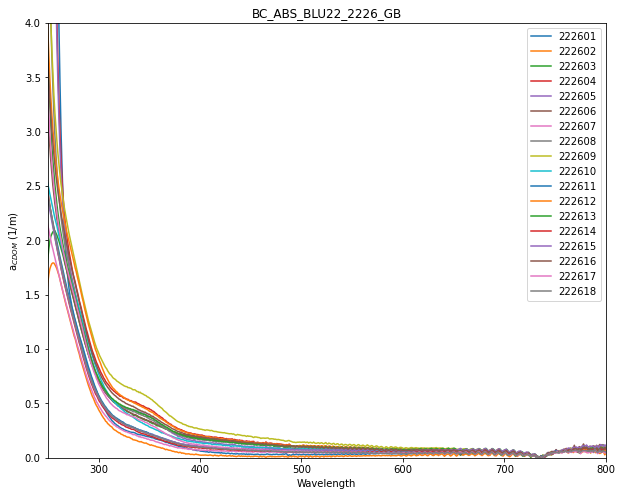

In [9]:
#HERE, WE MAKE A QUICK AND DIRTY GRAPH OF THE DATA TO SAVE AND CHECK WORK 

fig, ax = plt.subplots(figsize=(10,8))
df.plot(label='', ax=ax)
ax.set_ylim(-0,4)
ax.set_xlim(250,800)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.set_title("BC_ABS_BLU22_2226_GB")

#plt.savefig(path_2)

PART 2: REGRESSIONS

I need an output table for each sampling event with the sample number

we will get this with 2 regression methods 

there are two ways we are going to calculate the spectral slopes 
1. Single exponential (SEM) where: $A(g)=Ae^{slope}$
2. Hyperbolic (HM) where: $A(g)=A(\frac{wl}{532})^{slope}$

corresponding parameters = abs 254, abs 280, abs 320, abs 412, abs 444 

corresponding parameters = the spectral slope of 275 to 295, the spectral slope of 350 to 400, the spectral slope of 275 to 700

corresponding parameters = spectral ratio of spectral slope of 275 to 295 and the spectral slope of 350 to 400

corresponding parameters = baseline correction we used, so the b term 


In [ ]:
#DEFINE EXPONENTAL REGRESSION 
#A(g)=Ae^slope
def exp_equation(x, a, s, b):
    return a * np.exp(-s * x) + b

#DEFINE HYPERBOLIC REGRESSION 
#A(g)=A(wl/532)^slope
def hyp_equation(x, a, s, b):
    return a * ((x/532)**-s) + b

#DEFINE POWER LAW REGRESSION 
#




In [13]:
#HERE DO THE EXPONENTAL REGRESSION FOR ALL SAMPLES 
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #get the x and y values for all the slope intervals we want 
    ydata_s700 = df[(df['wl']>=275) & (df['wl']<=700)][col]
    xdata_s700 = df[(df['wl']>=275) & (df['wl']<=700)]['wl']
    ydata_s700 = np.asarray(ydata_s700, dtype=float).ravel()
    xdata_s700 = np.asarray(xdata_s700, dtype=float).ravel()
    ydata_s295 = df[(df['wl']>=275) & (df['wl']<=295)][col]
    xdata_s295 = df[(df['wl']>=275) & (df['wl']<=295)]['wl']
    ydata_s295 = np.asarray(ydata_s295, dtype=float).ravel()
    xdata_s295 = np.asarray(xdata_s295, dtype=float).ravel()
    ydata_s350 = df[(df['wl']>=350) & (df['wl']<=400)][col]
    xdata_s350 = df[(df['wl']>=350) & (df['wl']<=400)]['wl']
    ydata_s350 = np.asarray(ydata_s350, dtype=float).ravel()
    xdata_s350 = np.asarray(xdata_s350, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams_700 = (15, .001, 0)
    pams_295 = (10, .001, 0)
    pams_350 = (10, .001, 0)
    
    #regression exp_equation 275 to 700
    params, cv = curve_fit(exp_equation, xdata_s700, ydata_s700, p0=pams_700, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 275 to 700 and calcuate rSquared
    squaredDiffs = np.square(ydata_s700 - exp_equation(xdata_s700, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s700 - np.mean(ydata_s700))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_700 = rSquared
    ss_275_700 = s
    
    #get the waveleths we need
    abs_254 = exp_equation(252, a, s, b)
    abs_280 = exp_equation(280, a, s, b)
    abs_320 = exp_equation(320, a, s, b)
    abs_350 = exp_equation(350, a, s, b)
    abs_412 = exp_equation(412, a, s, b)
    abs_440 = exp_equation(440, a, s, b)
    
    #regression exp_equation 275 to 295
    params, cv = curve_fit(exp_equation, xdata_s295, ydata_s295, p0=pams_295, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 270 to 295 and calcuate rSquared
    squaredDiffs = np.square(ydata_s295 - exp_equation(xdata_s295, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s295 - np.mean(ydata_s295))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_295 = rSquared
    ss_275_295 = s
    
    #regression exp_equation 350 to 400
    params, cv = curve_fit(exp_equation, xdata_s350, ydata_s350, p0=pams_350, maxfev=maxfev)
    a, s, b = params
    
    #get the valuse for exp_equation 350 to 400 and calcuate rSquared
    squaredDiffs = np.square(ydata_s350 - exp_equation(xdata_s350, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s350 - np.mean(ydata_s350))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_350_400 = rSquared
    ss_350_400 = s 
    
    #get the spectral ratio 
    sr = ss_275_295 / ss_350_400
    
    dict = {'sample':[columnName],
        'ss_275_700_SEM':[ss_275_700],
        'ss_275_295_SEM':[ss_275_295],
        'ss_350_400_SEM':[ss_350_400],
        'R2_275_700':[R2_275_700],
        'R2_275_295':[R2_275_295],
        'R2_350_400':[R2_350_400],
        'SR_SEM':[sr],
        'abs_254_SEM':[abs_254], 
        'abs_280_SEM':[abs_280],
        'abs_320_SEM':[abs_320], 
        'abs_350_SEM':[abs_350],
        'abs_412_SEM':[abs_412], 
        'abs_440_SEM':[abs_440]}
    ss_outs = pd.DataFrame(dict)
    ss_outs = ss_outs.set_index('sample', drop=True)
    Frames.append(ss_outs)

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

,ss_275_700_SEM,ss_275_295_SEM,ss_350_400_SEM,R2_275_700,R2_275_295,R2_350_400,SR_SEM,abs_254_SEM,abs_280_SEM,abs_320_SEM,abs_350_SEM,abs_412_SEM,abs_440_SEM
sample,,,,,,,,,,,,,
222601,0.033934,0.010068,0.010055,0.992431,0.999764,0.996524,1.001282,2.808498,1.060157,0.241532,0.060361,-0.029627,-0.037294
222602,0.036977,0.018067,0.028121,0.995393,0.999540,0.989926,0.642471,2.658364,0.943303,0.214104,0.069890,0.006095,0.001472
222603,0.022858,0.021325,0.022604,0.983594,0.999652,0.995448,0.943440,2.249979,1.236006,0.558299,0.333338,0.160354,0.134191
222604,0.021042,0.013774,0.028720,0.983188,0.999666,0.995362,0.479593,2.483500,1.446532,0.711282,0.450615,0.234757,0.198982
222605,0.024116,0.012150,0.032124,0.981284,0.999671,0.994339,0.378223,2.467542,1.284629,0.525606,0.284907,0.109005,0.084045
222606,0.023556,0.018609,0.026317,0.983684,0.999763,0.995793,0.707085,2.229893,1.182376,0.497933,0.276426,0.110850,0.086678
222607,0.035048,0.019662,0.030078,0.995571,0.999702,0.993584,0.653714,2.478950,0.930268,0.230343,0.081684,0.010926,0.005244
222608,0.025308,0.014741,0.029815,0.985741,0.999744,0.995834,0.494412,2.467695,1.221641,0.452369,0.218784,0.056073,0.034348
222609,0.019013,0.015860,0.028075,0.982875,0.999738,0.995796,0.564923,2.508197,1.504575,0.744197,0.454098,0.192895,0.144984


In [14]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

R_level = .95 #set x to the r2 value you want to test

min_1 = ss_outs['R2_275_700'].min()
min_2 = ss_outs['R2_275_295'].min()
min_3 = ss_outs['R2_350_400'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
if min_2 < R_level:
    print("!!! WARNING !!! 275_295 has a bad R2 !!!")
if min_3 < R_level:
    print("!!! WARNING !!! 350_400 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")
    
ss_outs.loc[ss_outs.R2_275_700 < R_level, 'ss_275_700_SEM'] = np.nan
ss_outs.loc[ss_outs.R2_275_295 < R_level, 'ss_275_295_SEM'] = np.nan
ss_outs.loc[ss_outs.R2_350_400 < R_level, 'ss_350_400_SEM'] = np.nan
    
#HERE WE SAME THE SLOPE VALUES 
ss_275_700_SEM = ss_outs['ss_275_700_SEM']
ss_275_295_SEM = ss_outs['ss_275_295_SEM']
ss_350_400_SEM = ss_outs['ss_350_400_SEM']
abs_254_SEM = ss_outs['abs_254_SEM']
abs_280_SEM = ss_outs['abs_280_SEM']
abs_320_SEM = ss_outs['abs_320_SEM']
abs_412_SEM = ss_outs['abs_412_SEM']
abs_440_SEM = ss_outs['abs_440_SEM']
SR_SEM = ss_outs['SR_SEM']

THE FITS ARE GOOD, YAY!


In [16]:
#HERE DO THE HYPERBOLIC REGRESSION FOR ALL SAMPLES 
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #get the x and y values for all the slope intervals we want 
    #get the x and y values for all the slope intervals we want 
    ydata_s700 = df[(df['wl']>=275) & (df['wl']<=700)][col]
    xdata_s700 = df[(df['wl']>=275) & (df['wl']<=700)]['wl']
    ydata_s700 = np.asarray(ydata_s700, dtype=float).ravel()
    xdata_s700 = np.asarray(xdata_s700, dtype=float).ravel()
    ydata_s295 = df[(df['wl']>=275) & (df['wl']<=295)][col]
    xdata_s295 = df[(df['wl']>=275) & (df['wl']<=295)]['wl']
    ydata_s295 = np.asarray(ydata_s295, dtype=float).ravel()
    xdata_s295 = np.asarray(xdata_s295, dtype=float).ravel()
    ydata_s350 = df[(df['wl']>=350) & (df['wl']<=400)][col]
    xdata_s350 = df[(df['wl']>=350) & (df['wl']<=400)]['wl']
    ydata_s350 = np.asarray(ydata_s350, dtype=float).ravel()
    xdata_s350 = np.asarray(xdata_s350, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams_700 = (.001, 11, 0)
    pams_295 = (1, 0, 1)
    pams_350 = (1, 1, 1)
    
    maxfev = 1000000
    
    #regression exp_equation 275 to 700
    params, cv = curve_fit(hyp_equation, xdata_s700, ydata_s700, p0=pams_700, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 275 to 700 and calcuate rSquared
    squaredDiffs = np.square(ydata_s700 - hyp_equation(xdata_s700, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s700 - np.mean(ydata_s700))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_700 = rSquared
    ss_275_700 = s
    
    #get the waveleths we need
    abs_254 = hyp_equation(252, a, s, b)
    abs_280 = hyp_equation(280, a, s, b)
    abs_320 = hyp_equation(320, a, s, b)
    abs_350 = hyp_equation(350, a, s, b)
    abs_412 = hyp_equation(412, a, s, b)
    abs_440 = hyp_equation(440, a, s, b)
    
    #regression exp_equation 275 to 295
    params, cv = curve_fit(hyp_equation, xdata_s295, ydata_s295, p0=pams_295, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 270 to 295 and calcuate rSquared
    squaredDiffs = np.square(ydata_s295 - hyp_equation(xdata_s295, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s295 - np.mean(ydata_s295))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_275_295 = rSquared
    ss_275_295 = s
    
    #regression exp_equation 350 to 400
    params, cv = curve_fit(hyp_equation, xdata_s350, ydata_s350, p0=pams_350, maxfev=maxfev)
    a, s, b = params
    
    #print out for exp_equation 350 to 400 and calcuate rSquared
    squaredDiffs = np.square(ydata_s350 - hyp_equation(xdata_s350, a, s, b))
    squaredDiffsFromMean = np.square(ydata_s350 - np.mean(ydata_s350))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    R2_350_400 = rSquared
    ss_350_400 = s 
    
    #get the spectral ratio 
    sr = ss_275_295 / ss_350_400
    
    dict = {'sample':[columnName],
        'ss_275_700_HM':[ss_275_700],
        'ss_275_295_HM':[ss_275_295],
        'ss_350_400_HM':[ss_350_400],
        'R2_275_700':[R2_275_700],
        'R2_275_295':[R2_275_295],
        'R2_350_400':[R2_350_400],
        'SR_HM':[sr],
        'abs_254_HM':[abs_254], 
        'abs_280_HM':[abs_280],
        'abs_320_HM':[abs_320], 
        'abs_350_HM':[abs_350],
        'abs_412_HM':[abs_412], 
        'abs_440_HM':[abs_440]}
    ss_outs = pd.DataFrame(dict)
    ss_outs = ss_outs.set_index('sample', drop=True)
    Frames.append(ss_outs)

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

In [17]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

ss_outs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
ss_outs = ss_outs.drop('wl')

R_level = .95 #set x to the r2 value you want to test

min_1 = ss_outs['R2_275_700'].min()
min_2 = ss_outs['R2_275_295'].min()
min_3 = ss_outs['R2_350_400'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
if min_2 < R_level:
    print("!!! WARNING !!! 275_295 has a bad R2 !!!")
if min_3 < R_level:
    print("!!! WARNING !!! 350_400 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")

ss_outs.loc[ss_outs.R2_275_700 < R_level, 'ss_275_700_HM'] = np.nan
ss_outs.loc[ss_outs.R2_275_295 < R_level, 'ss_275_295_HM'] = np.nan
ss_outs.loc[ss_outs.R2_350_400 < R_level, 'ss_350_400_HM'] = np.nan
    
    
#HERE WE SAME THE SLOPE VALUES 
ss_275_700_HM = ss_outs['ss_275_700_HM']
ss_275_295_HM = ss_outs['ss_275_295_HM']
ss_350_400_HM = ss_outs['ss_350_400_HM']
abs_254_HM = ss_outs['abs_254_HM']
abs_280_HM = ss_outs['abs_280_HM']
abs_320_HM = ss_outs['abs_320_HM']
abs_412_HM = ss_outs['abs_412_HM']
abs_440_HM = ss_outs['abs_440_HM']
SR_HM = ss_outs['SR_HM']

THE FITS ARE GOOD, YAY!


In [ ]:
#HERE DO THE POWER LAW REGRESSION FOR ALL SAMPLES 

In [ ]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

PART 3: MAKE ESTIMATE OF INFLECTION 

So at a lot of these there is an infection at around 350 nm 

We need a way to estimate that inflection 

we are going to look for inflections between 300 and 400 nm and quantify them 


In [18]:
#EXPONENTAL REGRESSION A(g)=Ae^slope
def exp_equation(x, a, s, b):
    return a * np.exp(-s * x) + b

In [19]:
#NORMALIZE THE DATA
#x ′ = ( x − x m i n ) / ( x m a x − x m i n )
df1 = df[(df['wl']>=250) & (df['wl']<=700)]
min1 = df1.min(axis=0)
max1 = df1.max(axis=0)
rang = max1 - min1
rang 
df1 = (df1[:] - min1)/ rang
df1['wl'] = df1.index
df1

,222601,222602,222603,222604,222605,222606,222607,222608,222609,222610,222611,222612,222613,222614,222615,222616,222617,222618,wl
wl,,,,,,,,,,,,,,,,,,,
250.3281,0.989345,0.914165,0.893646,0.993882,0.982262,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,250.3281
250.7040,0.988188,0.929963,0.913004,1.000000,1.000000,0.981346,0.992528,0.961870,0.970795,0.991676,0.990657,0.976157,0.973677,0.986798,0.987921,0.977680,0.982191,0.993278,250.7040
251.0799,0.987515,0.940758,0.922341,0.965116,0.977293,0.959327,0.982963,0.930192,0.941394,0.984306,0.986319,0.956466,0.948468,0.977537,0.979574,0.958819,0.959508,0.980890,251.0799
251.4558,0.991040,0.946551,0.932589,0.978372,0.961265,0.940061,0.971529,0.897681,0.914053,0.978396,0.977443,0.936036,0.927133,0.968604,0.971431,0.940707,0.939189,0.973443,251.4558
251.8316,0.996852,0.961822,0.947165,0.959051,0.937063,0.922171,0.965020,0.863534,0.890735,0.972868,0.969501,0.915564,0.904686,0.955337,0.959826,0.920370,0.920898,0.963558,251.8316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698.6095,0.001318,0.007636,0.005693,0.003059,0.000641,0.003364,0.000000,0.001451,0.001308,0.004511,0.004338,0.006988,0.000000,0.000131,0.000000,0.000154,0.000000,0.000329,698.6095
698.9292,0.001722,0.006319,0.007288,0.003596,0.001443,0.003670,0.000849,0.002007,0.001374,0.006354,0.005339,0.008139,0.001381,0.001478,0.002986,0.001300,0.002606,0.004217,698.9292
699.2488,0.001587,0.011848,0.010020,0.003542,0.001656,0.003976,0.003623,0.003273,0.002257,0.009086,0.008542,0.008592,0.001069,0.001642,0.002511,0.001410,0.002606,0.004152,699.2488


In [20]:
#HERE WE FIND THE INTIGRAL OF ALL THE SAMPLE FOR 350 INFLECTION 
Frames = []
maxfev = 10000000
for (columnName, columnData) in df.iteritems():
    col = columnName
    #define where we expect to find the inflection 
    ydata = df1[(df1['wl']>=300) & (df1['wl']<=400)][col]
    xdata = df1[(df1['wl']>=300) & (df1['wl']<=400)]['wl']
    ydata = np.asarray(ydata, dtype=float).ravel()
    xdata = np.asarray(xdata, dtype=float).ravel()
    
    #here we take evething not in the infelction for the abs data
    ydata_r1 = df1[(df1['wl']>=250) & (df1['wl']<=300)][col]
    ydata_r2 = df1[(df1['wl']>=400) & (df1['wl']<=700)][col]
    ydata_r = pd.concat([ydata_r1, ydata_r2], axis=0)
    
    #here we take evething not in the infelction for the wl data
    xdata_r1 = df1[(df1['wl']>=250) & (df1['wl']<=300)]['wl']
    xdata_r2 = df1[(df1['wl']>=400) & (df1['wl']<=700)]['wl']
    xdata_r = pd.concat([xdata_r1, xdata_r2], axis=0)
    
    #here we make them both arrays so we can doo math 
    ydata_r = np.asarray(ydata_r, dtype=float).ravel()
    xdata_r = np.asarray(xdata_r, dtype=float).ravel()
    
    #set some innital guesses to the curve fit 
    pams = (1, .001, 0)
    
    #here we do an expodental fit for just the data where we expect there to de no inflection 
    #aka, what the regression would be without the inflection 
    params, cv = curve_fit(exp_equation, xdata_r, ydata_r, p0=pams, maxfev = maxfev)
    a, s, b = params
    
    #here we calculate the R squared of that regressions fit 
    squaredDiffs = np.square(ydata_r - exp_equation(xdata_r, a, s, b))
    squaredDiffsFromMean = np.square(ydata_r - np.mean(ydata_r))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    
    #here we take the differance of the accual data and the regressions fit that dident have that data 
    diffs = ydata - exp_equation(xdata, a, s, b)
    
    #here we normalize the data 
    diffs = (diffs - np.min(diffs)) / (np.max(diffs) - np.min(diffs))
    
    #here we flaten the data
    y1 = xdata[0]
    y2 = xdata[273]
    x1 = diffs[0]
    x2 = diffs[273]
    m = (x2 - x1)/(y2 - y1)
    mx = m * y1
    b = x1 - mx
    
    diffs = diffs - ((m*xdata)+b)
    
    #here we calculate the intigral 
    inter = scipy.integrate.simps(ydata, x=diffs, even='avg')
    
    #plt.plot(xdata, diffs, 'ko', label='data')
    #plt.plot(xdata, gauss(xdata, *gauss_fit(xdata, diffs)), '--r', label='fit')
    #plt.show()
    #print('The offset of the gaussian baseline is', gaus_baseline)
    #print('The center of the gaussian fit is', center_gaus)
    #print('The sigma of the gaussian fit is', sigma)
    #print('The maximum intensity of the gaussian fit is', H + A)
    #print('The Amplitude of the gaussian fit is', A)
    #print('The FWHM of the gaussian fit is', FWHM)
    
    #here we define some columns for a new data frame with the sample, the R2, and the diffs intigral 
    dict = {'sample':[columnName],
        '350_intergration':[inter],
        'R2':[rSquared]}
    diff = pd.DataFrame(dict)
    
    #here we set the index and append the data together 
    diffs = diff.set_index('sample', drop=True)
    Frames.append(diffs) # adds the new col from each scan to a part of frames 
    
    
diffs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
diffs = diffs.drop('wl') # drops the wl col 
diffs

,350_intergration,R2
sample,,
222601,-0.007089,0.977326
222602,0.016488,0.990311
222603,0.018605,0.990867
222604,-0.000139,0.974642
222605,-0.000602,0.975996
222606,0.045641,0.996613
222607,0.021031,0.997915
222608,0.033611,0.985835
222609,0.058475,0.989789


In [21]:
#HERE WE TEST TO MAKE SURE THE R SQAURED IS GOOD 
#this will let us know if something is wrong and where 

diffs = pd.concat(Frames, axis=0, ignore_index=False) # adds all the things in the frame together to make a new df 
diffs = diffs.drop('wl') # drops the wl col 

R_level = .95 #set x to the r2 value you want to test

min_1 = diffs['R2'].min()

if min_1 < R_level: 
    print("!!! WARNING !!! 275_700 has a bad R2 !!!")
else: 
    print("THE FITS ARE GOOD, YAY!")

diffs.loc[diffs.R2 < R_level, '350_intergration'] = np.nan

THE FITS ARE GOOD, YAY!


In [23]:
#NOW WE SAVE ALL THE VALUSE WE WANTED TO A TABEL 
outputs = pd.concat([ss_275_700_SEM, ss_275_295_SEM, ss_350_400_SEM,
                    ss_275_700_HM, ss_275_295_HM, ss_350_400_HM,
                    abs_254_SEM, abs_280_SEM, abs_320_SEM, abs_412_SEM, abs_440_SEM,
                    abs_254_HM, abs_280_HM, abs_320_HM, abs_412_HM, abs_440_HM,
                    SR_SEM, SR_HM], axis=1)
#outputs = outputs.rename(columns={0: 'baseline_correction', 1: 'abs_254',
#                                  2: 'abs_280', 3: 'abs_320', 4: 'abs_412', 5: 'abs_444'})
outputs['350_intergration'] = diffs['350_intergration']
outputs['bcorr'] = bcorr
outputs['abs_254'] = abs_254_data
outputs['abs_254'] = abs_254_data
outputs['abs_320'] = abs_320_data
outputs['abs_350'] = abs_350_data
outputs['abs_412'] = abs_412_data
outputs['abs_440'] = abs_440_data

outputs 
#SAVE IT 
#outputs.to_csv(path_3)

,ss_275_700_SEM,ss_275_295_SEM,ss_350_400_SEM,ss_275_700_HM,ss_275_295_HM,ss_350_400_HM,abs_254_SEM,abs_280_SEM,abs_320_SEM,abs_412_SEM,...,abs_440_HM,SR_SEM,SR_HM,350_intergration,bcorr,abs_254,abs_320,abs_350,abs_412,abs_440
sample,,,,,,,,,,,,,,,,,,,,,
222601,0.033934,0.010068,0.010055,10.196137,1.865604,2.733364,2.808498,1.060157,0.241532,-0.029627,...,-0.034584,1.001282,0.682530,-0.007089,-0.082221,8.642898,0.286901,0.192612,0.049993,0.034180
222602,0.036977,0.018067,0.028121,11.081768,4.132872,-0.001300,2.658364,0.943303,0.214104,0.006095,...,0.002958,0.642471,-3180.072814,0.016488,-0.022021,1.785622,0.229721,0.121142,0.022090,0.012940
222603,0.022858,0.021325,0.022604,7.020416,5.060231,7.395829,2.249979,1.236006,0.558299,0.160354,...,0.143306,0.943440,0.684201,0.018605,0.032250,2.059799,0.474548,0.331130,0.163744,0.138507
222604,0.021042,0.013774,0.028720,6.543705,2.912205,-0.001196,2.483500,1.446532,0.711282,0.234757,...,0.210361,0.479593,-2435.571302,-0.000139,0.066306,7.165591,0.577382,0.451810,0.191726,0.159196
222605,0.024116,0.012150,0.032124,7.453383,2.449785,10.895851,2.467542,1.284629,0.525606,0.109005,...,0.092775,0.378223,0.224837,-0.000602,-0.012459,6.916951,0.487216,0.378689,0.137991,0.111059
222606,0.023556,0.018609,0.026317,7.221409,4.288995,8.772564,2.229893,1.182376,0.497933,0.110850,...,0.095254,0.707085,0.488910,0.045641,-0.026234,2.610953,0.477082,0.336770,0.171757,0.142936
222607,0.035048,0.019662,0.030078,10.514246,4.586557,-0.001329,2.478950,0.930268,0.230343,0.010926,...,0.007177,0.653714,-3450.873313,0.021031,-0.053252,1.954277,0.273577,0.168392,0.066886,0.060849
222608,0.025308,0.014741,0.029815,7.762005,3.188591,-0.000929,2.467695,1.221641,0.452369,0.056073,...,0.042251,0.494412,-3430.647056,0.033611,-0.078265,3.692841,0.487424,0.358291,0.156195,0.132941
222609,0.019013,0.015860,0.028075,5.946523,3.506351,9.406753,2.508197,1.504575,0.744197,0.192895,...,0.158714,0.564923,0.372748,0.058475,-0.029017,3.747098,0.693680,0.550930,0.249740,0.208567
